Data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('heartdisease.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [5]:
df['Ca'] = df['Ca'].fillna(df['Ca'].mean())
df['Thal'] = df['Thal'].fillna(df['Thal'].mode()[0])

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [7]:
df.duplicated().sum()

np.int64(0)

 Data integration


In [8]:
# Create Subset
df1 = df[['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol']]
df2 = df[['Unnamed: 0', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']]

In [9]:
# Merge above Subset
df_merged = pd.merge(df1, df2, on='Unnamed: 0')
df_merged.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Data Transformation


In [10]:
print(df_merged.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [11]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [12]:
categorical_columns = ['ChestPain','Thal', 'AHD']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_merged[col] = le.fit_transform(df_merged[col])
    label_encoders[col] = le

In [13]:
print("\nTransformed Data:")
print(df_merged.head())


Transformed Data:
   Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0           1   63    1          3     145   233    1        2    150      0   
1           2   67    1          0     160   286    0        2    108      1   
2           3   67    1          0     120   229    0        2    129      1   
3           4   37    1          1     130   250    0        0    187      0   
4           5   41    0          2     130   204    0        2    172      0   

   Oldpeak  Slope   Ca  Thal  AHD  
0      2.3      3  0.0     0    0  
1      1.5      2  3.0     1    1  
2      2.6      2  2.0     2    1  
3      3.5      3  0.0     1    0  
4      1.4      1  0.0     1    0  


Error correcting

In [14]:
print("\nCheck for invalid Ca values:")
print(df_merged[df_merged['Ca'] > 3])


Check for invalid Ca values:
Empty DataFrame
Columns: [Unnamed: 0, Age, Sex, ChestPain, RestBP, Chol, Fbs, RestECG, MaxHR, ExAng, Oldpeak, Slope, Ca, Thal, AHD]
Index: []


In [15]:
invalid_age = df_merged[(df_merged['Age'] <= 0)]
print(f"Invalid Age Entries:\n{invalid_age}")

Invalid Age Entries:
Empty DataFrame
Columns: [Unnamed: 0, Age, Sex, ChestPain, RestBP, Chol, Fbs, RestECG, MaxHR, ExAng, Oldpeak, Slope, Ca, Thal, AHD]
Index: []


In [16]:
numerical_cols = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'Ca']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col} has {outliers} outliers.")

Age has 0 outliers.
RestBP has 9 outliers.
Chol has 5 outliers.
MaxHR has 1 outliers.
Oldpeak has 5 outliers.
Ca has 20 outliers.


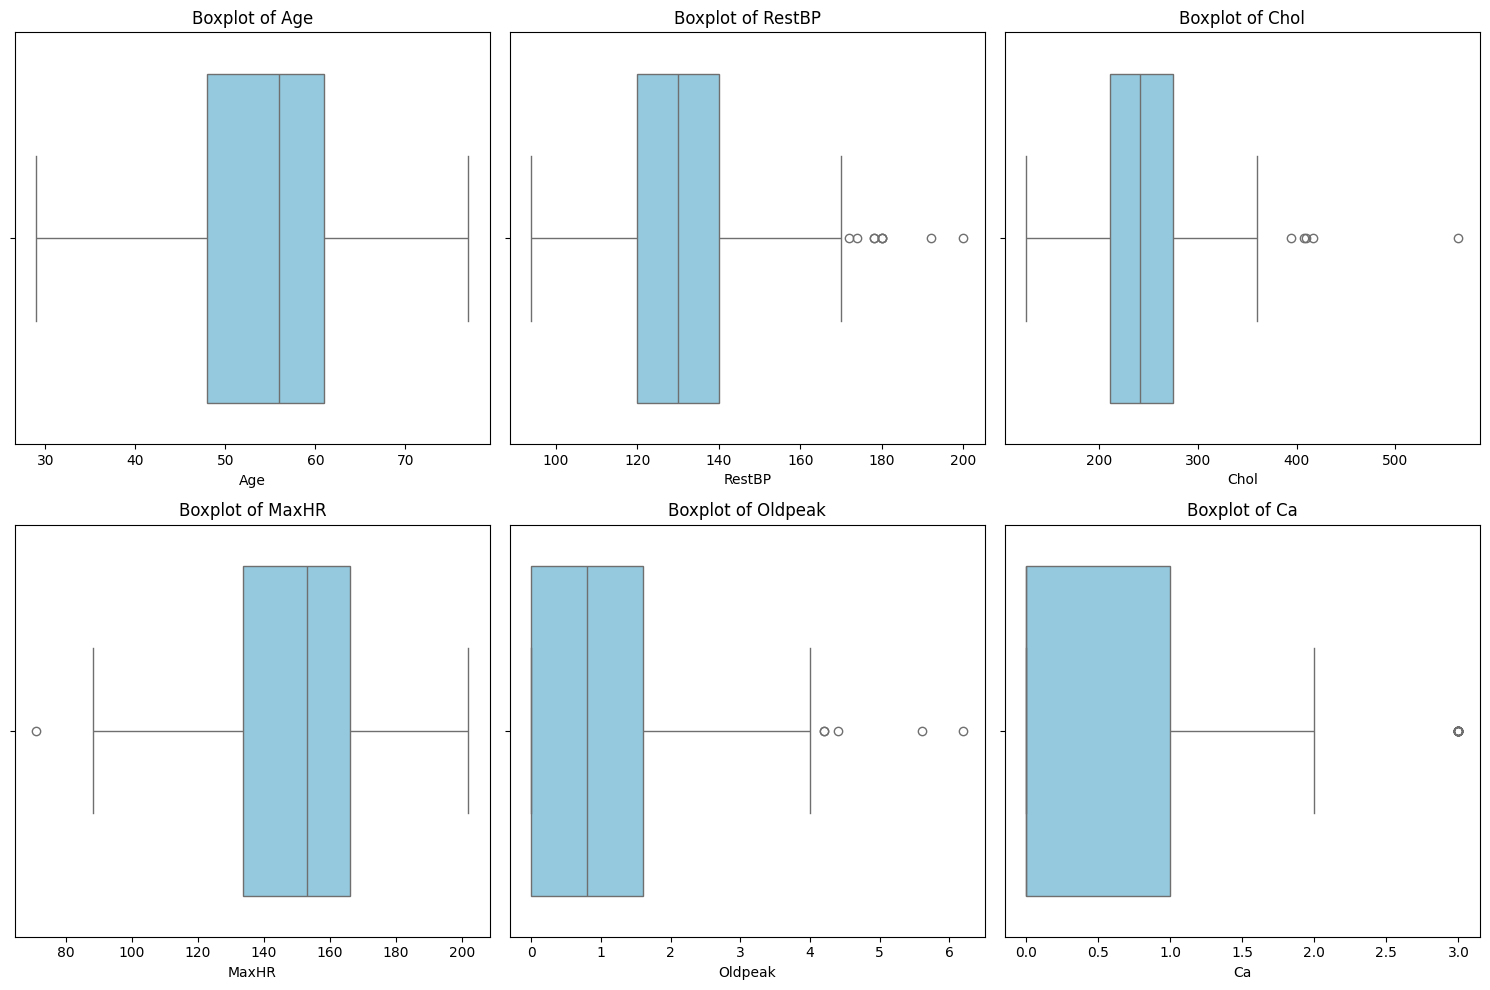

In [17]:
numerical_cols = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak', 'Ca']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [18]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


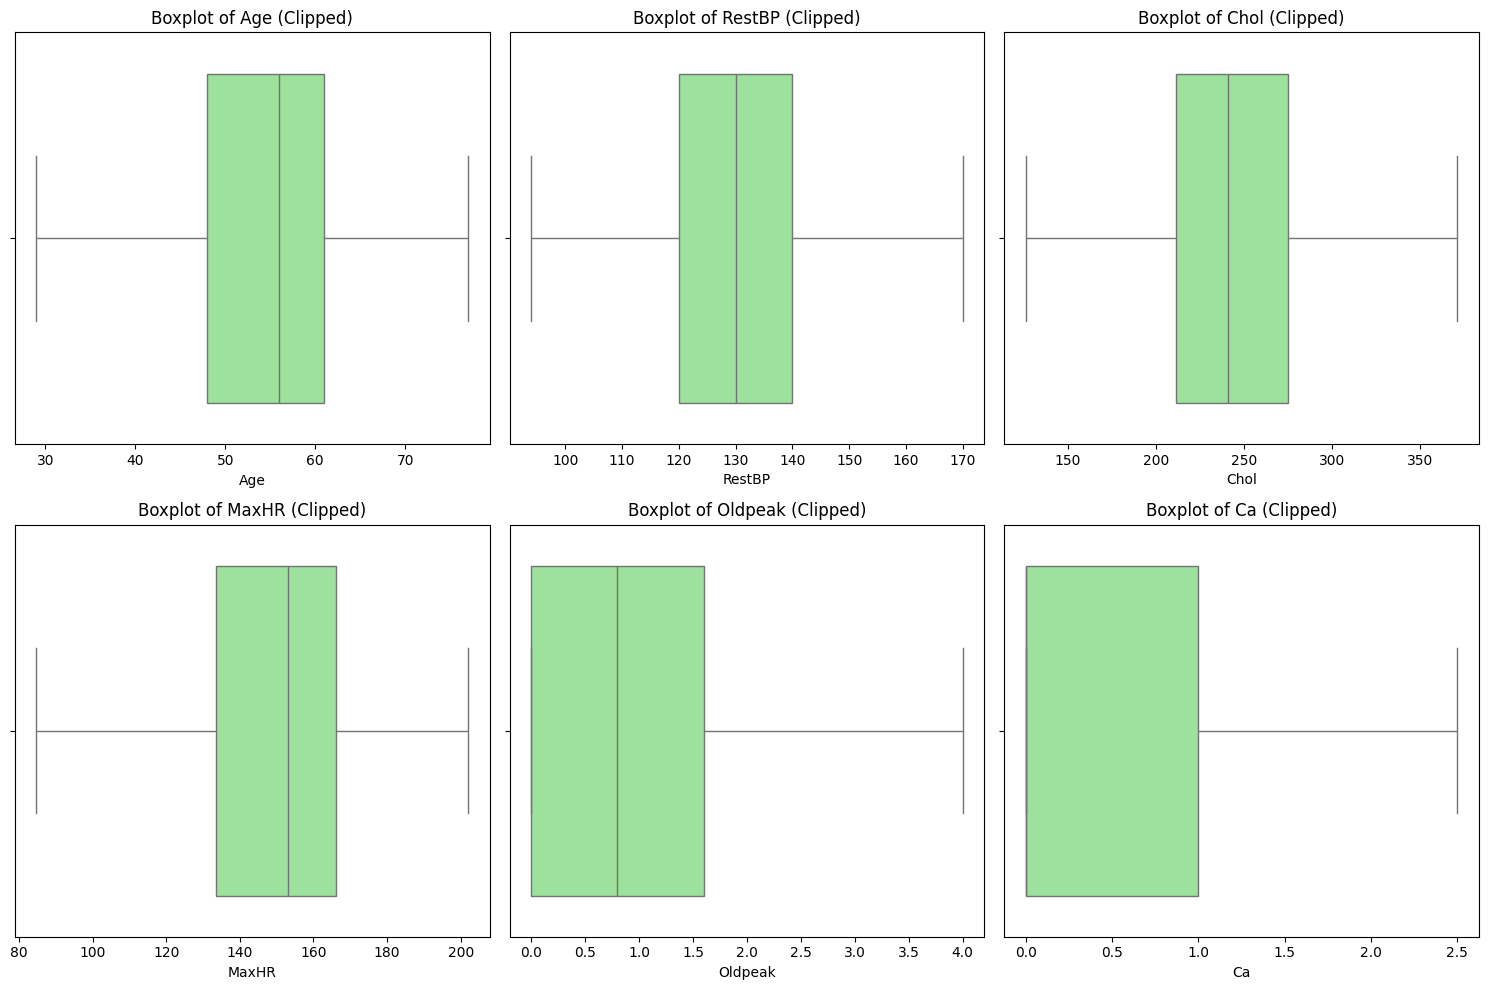

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col} (Clipped)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

Data model building

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
X = df_merged.drop(['AHD', 'Unnamed: 0'], axis=1)
y = df_merged['AHD']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred = model.predict(X_test)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8688524590163934

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



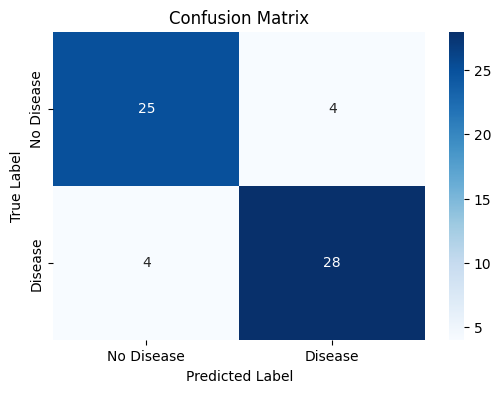

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Example

In [27]:
sample_input = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(sample_input)
print("Prediction (1 = Disease, 0 = No Disease):", prediction[0])


Prediction (1 = Disease, 0 = No Disease): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
